In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
### input ###

input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')

print(input_data.head())

    frmDist      date  inTp  inHd  otmsuplyqy  acSlrdQy  cunt   ph  outTp  \
0  DBSF1059  20220926   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
1  DBSF1059  20221001   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
2  DBSF1059  20221002   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
3  DBSF1059  20221003   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
4  DBSF1059  20221004   0.0   0.0         0.0       0.0   0.0  0.0    0.0   

   outWs  ...  outtrn_cumsum   WaterUsage   WaterCost  FertilizerUsage  \
0    0.0  ...            0.0     0.000000    0.000000         0.000000   
1    0.0  ...            0.0  1347.554178  202.133127      4711.308821   
2    0.0  ...            0.0    69.899353   10.484903       271.379890   
3    0.0  ...            0.0   412.225065   61.833760      1539.505534   
4    0.0  ...            0.0   590.608634   88.591295      2614.973165   

   FertilizerCost     CO2Usage    CO2Cost  MistUsageTime    Mist Cost  \
0        0.000000  

In [55]:
input_data["frmDist"] = input_data["frmDist"].str[-4:] # frmDist 컬럼 str문자 삭제
print(input_data.head())

  frmDist      date  inTp  inHd  otmsuplyqy  acSlrdQy  cunt   ph  outTp  \
0    1059  20220926   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
1    1059  20221001   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
2    1059  20221002   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
3    1059  20221003   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
4    1059  20221004   0.0   0.0         0.0       0.0   0.0  0.0    0.0   

   outWs  ...  outtrn_cumsum   WaterUsage   WaterCost  FertilizerUsage  \
0    0.0  ...            0.0     0.000000    0.000000         0.000000   
1    0.0  ...            0.0  1347.554178  202.133127      4711.308821   
2    0.0  ...            0.0    69.899353   10.484903       271.379890   
3    0.0  ...            0.0   412.225065   61.833760      1539.505534   
4    0.0  ...            0.0   590.608634   88.591295      2614.973165   

   FertilizerCost     CO2Usage    CO2Cost  MistUsageTime    Mist Cost  \
0        0.000000     0.000000 

In [40]:
print(input_data.describe())

print(input_data.isnull().sum())

               date          inTp          inHd    otmsuplyqy      acSlrdQy  \
count  8.484000e+04  84840.000000  84840.000000  84840.000000  84840.000000   
mean   2.018306e+07     16.741165     69.840334     63.771906    859.358175   
std    1.415661e+04      7.844482     30.632917     50.989079    863.627104   
min    2.017071e+07      0.000000      0.000000      0.000000      0.000000   
25%    2.017121e+07     15.181276     67.966019      0.000000      0.000000   
50%    2.018041e+07     18.164113     78.384204     67.951238    762.690836   
75%    2.018120e+07     21.158215     88.724599     91.599089   1477.986231   
max    2.022121e+07     39.221978    119.051100    335.648934   4422.127255   

               cunt            ph         outTp         outWs  daysuplyqy  \
count  84840.000000  84840.000000  84840.000000  84840.000000     84840.0   
mean      11.050016      4.329564      8.919073      0.507100         0.0   
std       13.169075      2.360309      9.562816      0.73

/tmp/ipykernel_739/1947985746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = input_data.corr()


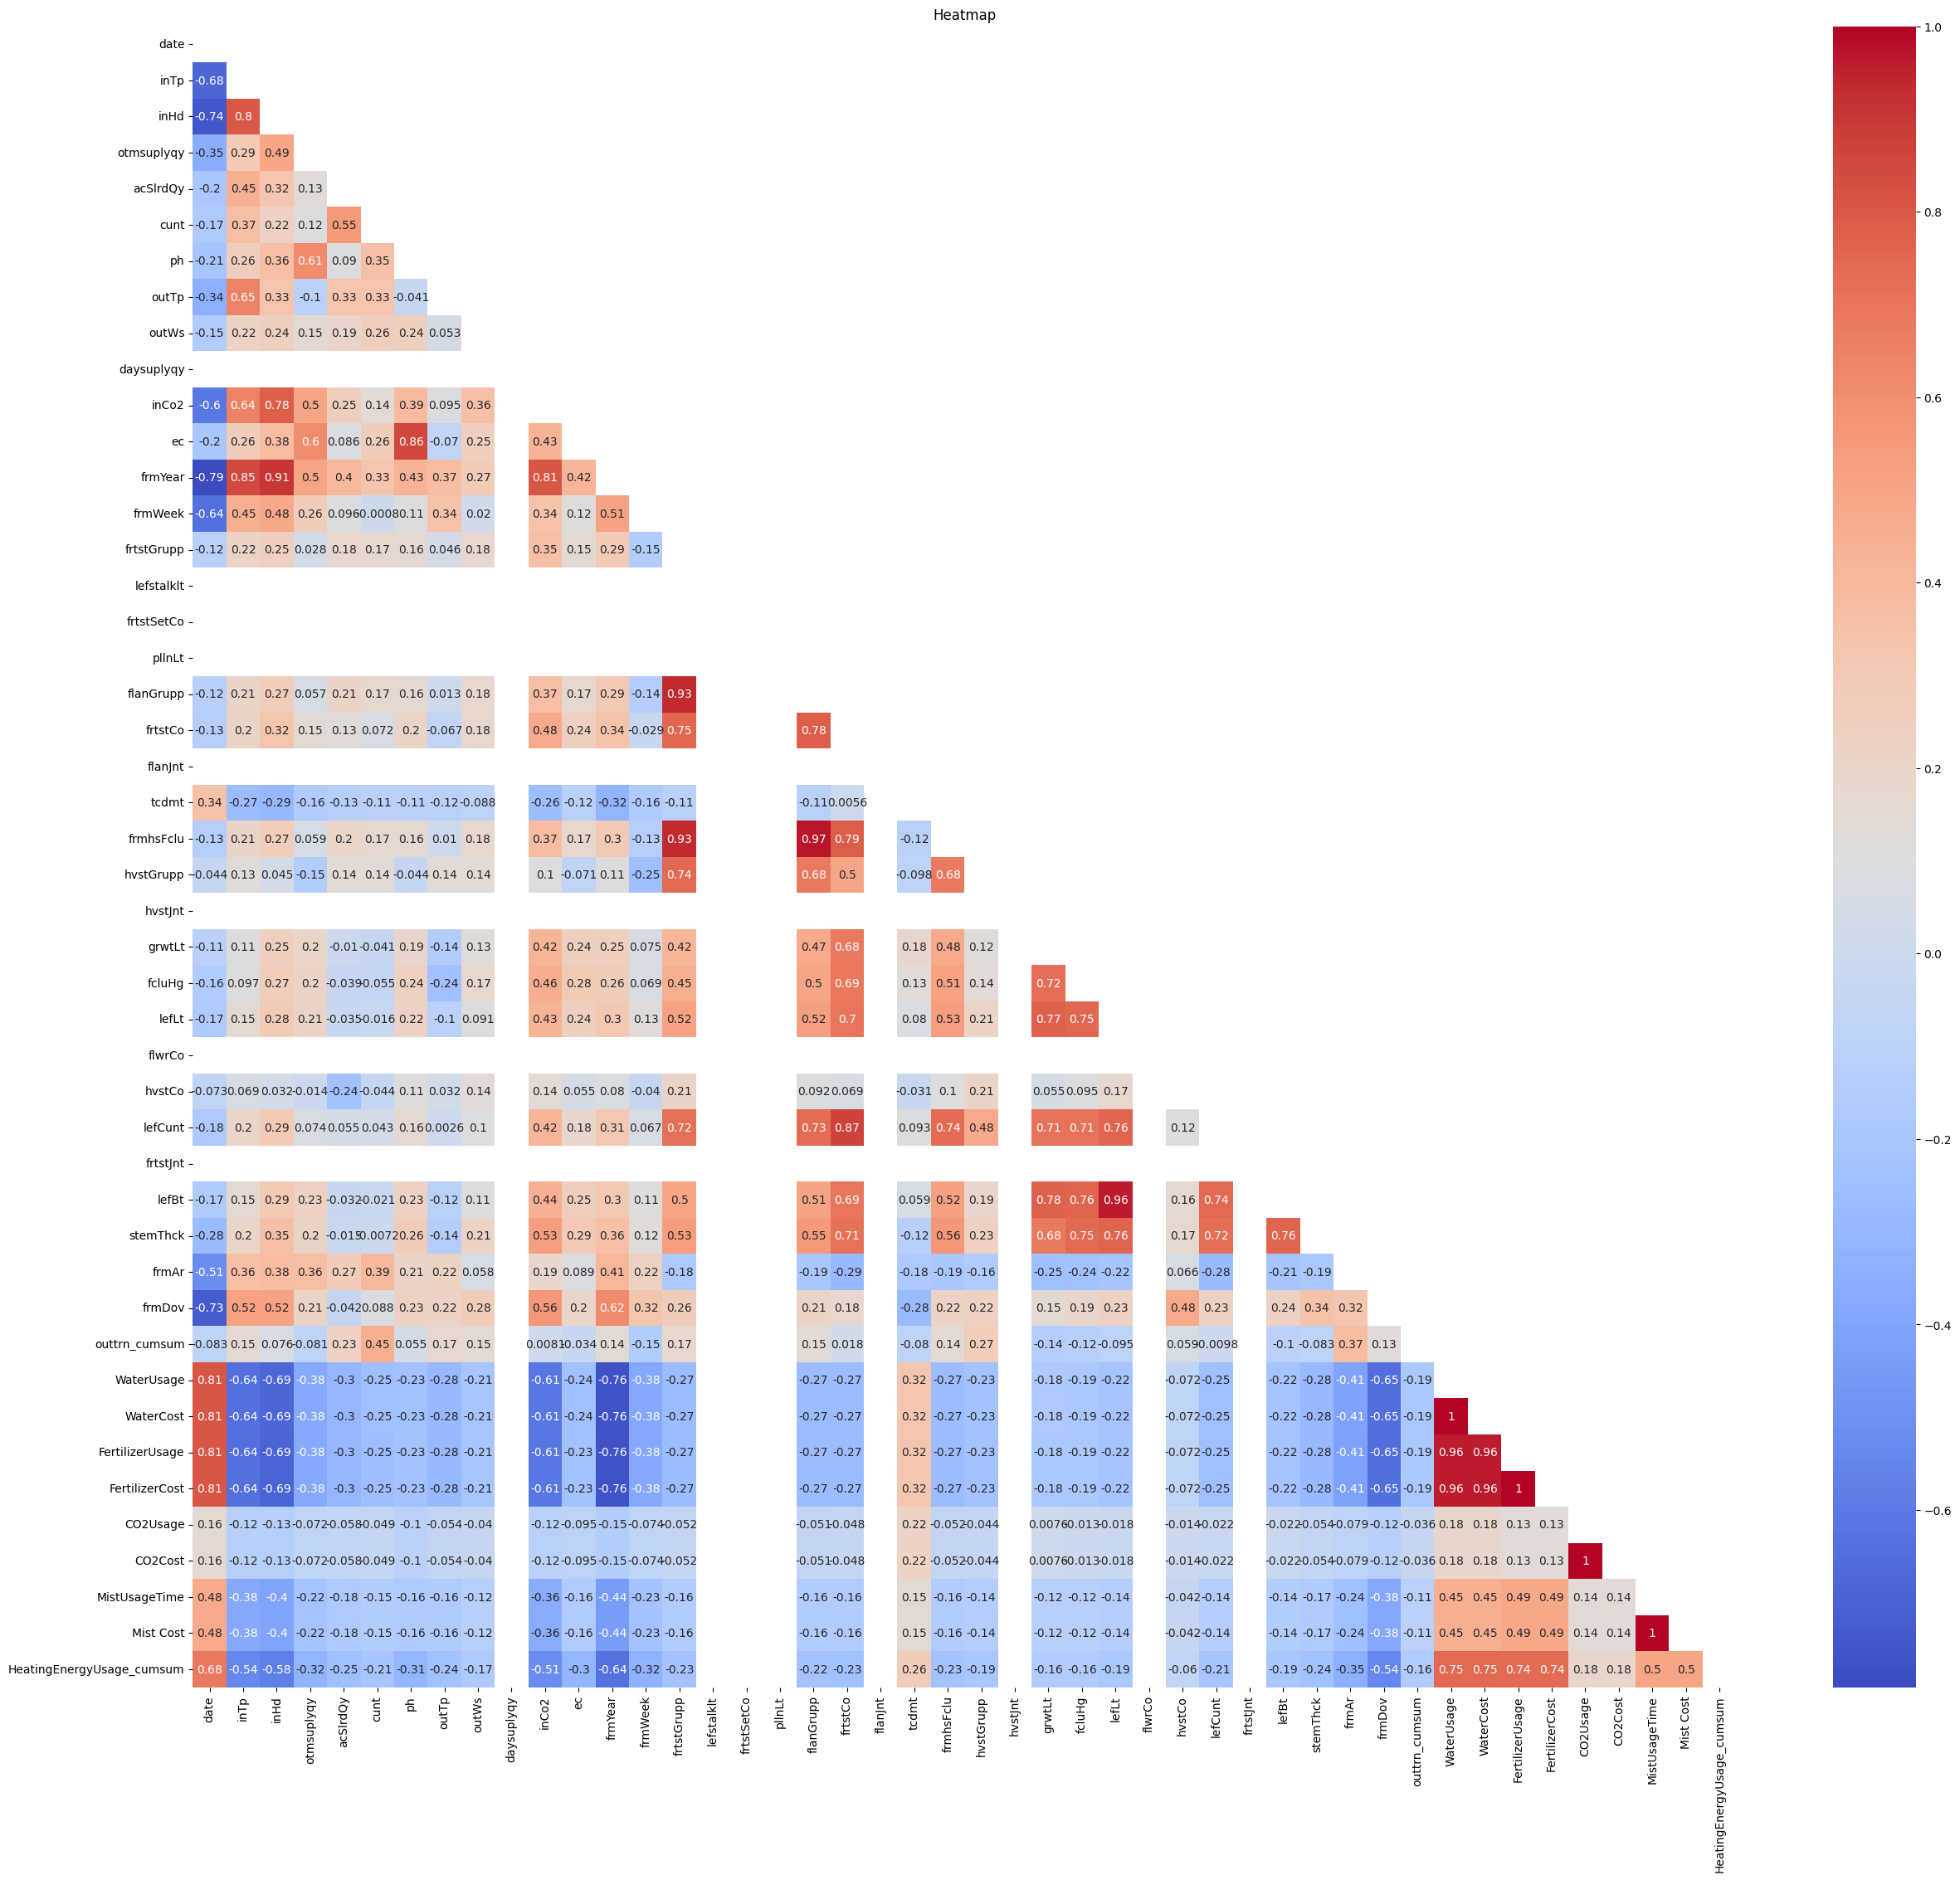

In [41]:
corr_matrix = input_data.corr()
plt.figure(figsize=(30,26))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Heatmap')
plt.show()

In [42]:
# 히트맵 리스트화
corr_matrix = input_data.corr()

sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

sorted_corr = sorted_corr[sorted_corr != 1]

print(sorted_corr)

/tmp/ipykernel_739/2126953804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = input_data.corr()


FertilizerCost             FertilizerUsage    1.0
FertilizerUsage            FertilizerCost     1.0
Mist Cost                  MistUsageTime      1.0
MistUsageTime              Mist Cost          1.0
WaterCost                  WaterUsage         1.0
                                             ... 
HeatingEnergyUsage_cumsum  pllnLt             NaN
                           flanJnt            NaN
                           hvstJnt            NaN
                           flwrCo             NaN
                           frtstJnt           NaN
Length: 2078, dtype: float64


In [58]:
X = input_data.drop(['outtrn_cumsum', 'HeatingEnergyUsage_cumsum'], axis=1)
y = input_data[['outtrn_cumsum', 'HeatingEnergyUsage_cumsum']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = RandomForestRegressor(criterion="squared_error",n_estimators=200, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

RMSE: 44489.25157984327
R2: 0.966177781439404


In [61]:
### output ###
print(f"RMSE:", rmse)
print(f"R2:", r2)

RMSE: 44489.25157984327
R2: 0.966177781439404


In [24]:
# def train_and_evaluate_model(n_estimators, min_samples_leaf):
#     model = RandomForestRegressor(
#         n_estimators=n_estimators,
#         random_state=42,
#         criterion='squared_error',
#         bootstrap=False,
#         min_samples_leaf=min_samples_leaf
#     )
    
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
    
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
    
#     return rmse, r2

# #파라미터 범위 정의
# n_estimators_range = [1500]
# min_samples_leaf_range = [50]

# results = []

# for n_estimators in n_estimators_range:
#     for min_samples_leaf in min_samples_leaf_range:
#         rmse, r2 = train_and_evaluate_model(n_estimators, min_samples_leaf)
#         results.append((n_estimators, min_samples_leaf, rmse, r2))

# for n_estimators, min_samples_leaf, rmse, r2 in results:
#     print(f"n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}")
#     print(f"RMSE: {rmse}")
#     print(f"R2: {r2}")
#     print("="*50)

KeyboardInterrupt: 